# EDA

In [33]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

In [34]:
# Import data
df = pd.read_csv('../data-ignore/train.csv')
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


### Data fields

In [35]:
# TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
# VisitNumber - an id corresponding to a single trip by a single customer
# Weekday - the weekday of the trip
# Upc - the UPC number of the product purchased
# ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
# DepartmentDescription - a high-level description of the item's department
# FinelineNumber - a more refined category for each of the products, created by Walmart

### EDA: TripType

In [36]:
# Check number of unique
df['TripType'].nunique()

38

In [37]:
# Check value counts
value_counts_df = pd.DataFrame(df['TripType'].value_counts())
value_counts_df.reset_index(inplace=True)
value_counts_df.sort_values(by='TripType')

,TripType,count
18,3,6827
35,4,901
14,5,13836
26,6,3405
5,7,23199
6,8,22844
12,9,16820
31,12,2108
37,14,35
17,15,7147


### EDA: VisitNumber

In [38]:
# Check number of unique visit number
df['VisitNumber'].nunique()

95674

In [39]:
# Group by visit number, get the average trip type(should be the same for all instances of that visit)
grouped_visit = df.groupby('VisitNumber')[['TripType']].mean()
grouped_visit.reset_index(inplace=True)
grouped_visit

,VisitNumber,TripType
0,5,999.0
1,7,30.0
2,8,26.0
3,9,8.0
4,10,8.0
...,...,...
95669,191343,25.0
95670,191344,22.0
95671,191345,39.0
95672,191346,39.0


In [40]:
# Verfiy that the number of unique visits is the same
grouped_visit['VisitNumber'].nunique()

95674

In [41]:
# Change TripType 999 to 50 for easier visualization
grouped_visit['TripType'] = grouped_visit['TripType'].apply(lambda x: 50 if x==999.0 else x)

In [42]:
# Check each TripType has how many unique visits
visits_per_triptype = pd.DataFrame(grouped_visit['TripType'].value_counts())
visits_per_triptype.reset_index(inplace=True)
visits_per_triptype.sort_values(by='TripType')

,TripType,count
8,3.0,3643
34,4.0,346
6,5.0,4593
17,6.0,1277
5,7.0,5752
0,8.0,12161
2,9.0,9464
35,12.0,269
37,14.0,4
20,15.0,978


<Axes: >

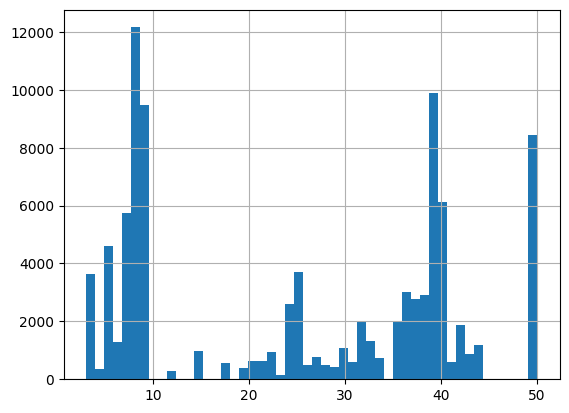

In [ ]:
# Check the distribution
grouped_visit['TripType'].hist(bins=50)

In [49]:
# Get the number of items purchased per trip
num_unique_items = df.groupby('VisitNumber')[['Upc']].count()
num_unique_items.reset_index(inplace=True)
num_unique_items

,VisitNumber,Upc
0,5,1
1,7,2
2,8,22
3,9,3
4,10,3
...,...,...
95669,191343,7
95670,191344,5
95671,191345,13
95672,191346,17


<Axes: >

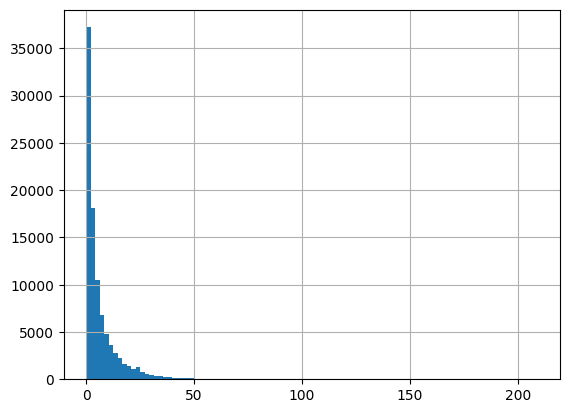

In [54]:
# Plot the distribution
num_unique_items['Upc'].hist(bins=100)

In [55]:
num_unique_items['Upc'].describe()

count    95674.000000
mean         6.719955
std          8.537999
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        209.000000
Name: Upc, dtype: float64

<Axes: >

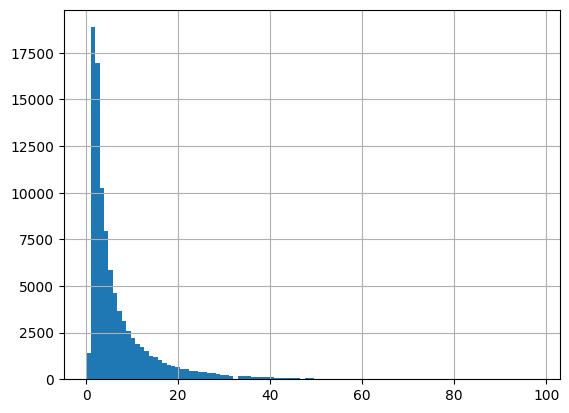

In [ ]:
# Plot the distribution of number of unique items per trip (under 75 items due to outliers)
num_unique_items[num_unique_items['Upc'] < 100]['Upc'].hist(bins=101)

In [ ]:
# Check the extreme values
num_unique_items[num_unique_items['Upc'] >= 100]

,VisitNumber,Upc
4662,9181,113
30523,60971,112
32914,65792,109
36262,72439,209
40156,80318,104
43970,88011,151


In [ ]:
# Get the total number of scans per visit
total_scan_count = df.groupby('VisitNumber')[['ScanCount']].sum()
total_scan_count.reset_index(inplace=True)
total_scan_count

,VisitNumber,ScanCount
0,5,-1
1,7,2
2,8,28
3,9,3
4,10,3
...,...,...
95669,191343,9
95670,191344,5
95671,191345,17
95672,191346,17


<Axes: >

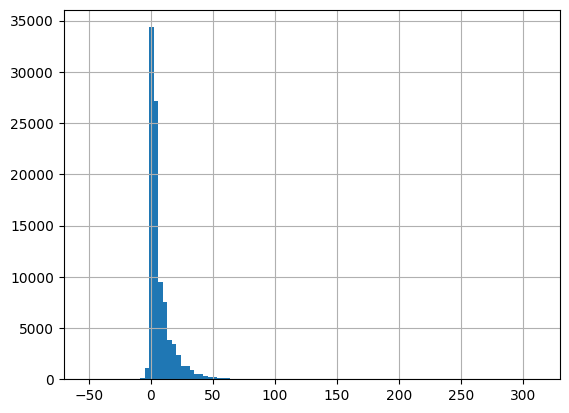

In [76]:
# Plot the distribution of total number of scans per visit
total_scan_count['ScanCount'].hist(bins=100)

<Axes: >

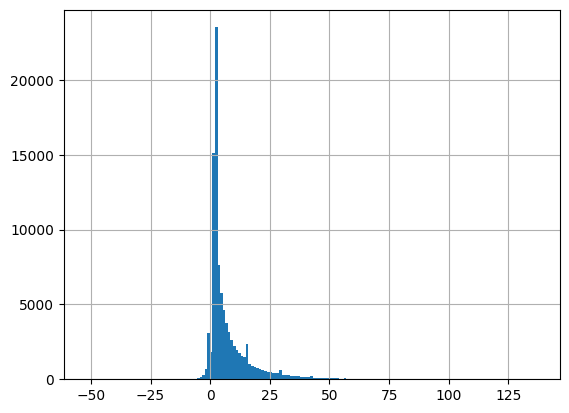

In [84]:
# Plot the distribution of total number of scans per visit (under 100)
total_scan_count[total_scan_count['ScanCount']<150]['ScanCount'].hist(bins=175)

In [ ]:
# Check the extreme values (>= 150)
total_scan_count[total_scan_count['ScanCount']>=150]

,VisitNumber,ScanCount
36262,72439,311
43970,88011,183


In [ ]:
# Check the extreme values (<= -15)
total_scan_count[total_scan_count['ScanCount']<-15]

,VisitNumber,ScanCount
7781,15380,-17
13789,27471,-52
25302,50671,-26
30563,61053,-26
41507,83064,-18
65589,131193,-37
66562,133103,-23
67780,135558,-21
92614,185196,-16


In [95]:
# Get the avg number of scans per visit
avg_scan_count = df.groupby('VisitNumber')[['ScanCount']].mean()
avg_scan_count.reset_index(inplace=True)
avg_scan_count

,VisitNumber,ScanCount
0,5,-1.000000
1,7,1.000000
2,8,1.217391
3,9,1.000000
4,10,1.000000
...,...,...
95669,191343,1.285714
95670,191344,1.000000
95671,191345,1.307692
95672,191346,1.000000


<Axes: >

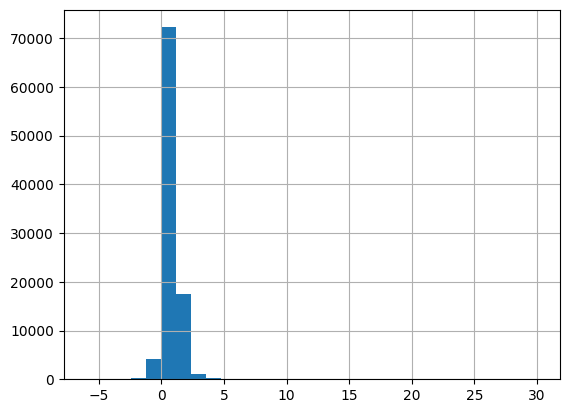

In [103]:
# Plot the distribution of avg number of scans per item per visit
avg_scan_count['ScanCount'].hist(bins=30)

<Axes: >

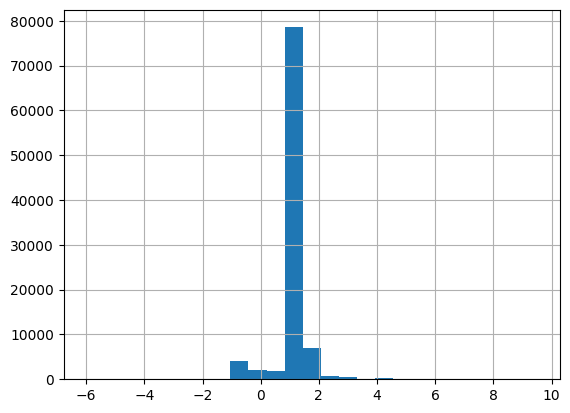

In [111]:
# Plot the distribution of avg number of scans per item per visit (without outliers)
avg_scan_count[avg_scan_count['ScanCount'] < 10]['ScanCount'].hist(bins=25)

In [ ]:
# Check the extreme values
avg_scan_count[avg_scan_count['ScanCount'] > 10]

,VisitNumber,ScanCount
3744,7379,30.0
22776,45738,11.2
26192,52371,11.5
27142,54281,14.0
29781,59515,12.0
44295,88676,11.0
47074,94195,12.0
47821,95785,12.0
53551,107346,17.0
55458,111082,18.0


In [98]:
df[df['VisitNumber'] == 72439]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
244440,24,72439,Tuesday,8.861669e+10,1,BOYS WEAR,1025.0
244441,24,72439,Tuesday,7.602631e+09,2,COOK AND DINE,2067.0
244442,24,72439,Tuesday,7.214063e+09,1,PERSONAL CARE,3090.0
244443,24,72439,Tuesday,4.393559e+09,2,MENS WEAR,5542.0
244444,24,72439,Tuesday,4.747559e+09,1,CELEBRATION,5507.0
...,...,...,...,...,...,...,...
244644,24,72439,Tuesday,8.494340e+10,1,COOK AND DINE,2074.0
244645,24,72439,Tuesday,8.494340e+10,2,COOK AND DINE,2074.0
244646,24,72439,Tuesday,8.494340e+10,1,COOK AND DINE,2074.0
244647,24,72439,Tuesday,7.153414e+09,1,INFANT APPAREL,1602.0
